### CARMA PSD \& SF

<br>**Author(s):** Weixiang Yu
<br>**Last run:** 07-23-20
<br>**Short description:** This notebook will develope functions to compute analytic PSD/SF of a CARMA process given some input parameters. 

In [1]:
# import basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os, sys

# see if local stores mpl style, else use from src
try:
    plt.style.use('yu_basic')
except:
    mpl.rc_file('https://raw.githubusercontent.com/ywx649999311/project_template'
                '/master/%7B%7Bcookiecutter.project_name%7D%7D/src/vis/mpl/yu_basic.rc')

pd.set_option('display.max_columns', 999)
%matplotlib inline

In [2]:
# import GP modules
from agntk.carma.CARMATerm import *
from agntk.lc.utils import *
from celerite import GP

### 1. PSD

In [3]:
def carma_psd(arparams, maparams):
    arparams = np.insert(arparams, 0, 1)
    maparams = np.array(maparams)
    arparams_rv = arparams[::-1]
    
    def psd(f):
        # init terms
        num_terms = np.complex(0)
        denom_terms = np.complex(0)

        for i, param in enumerate(maparams):
            num_terms += param*np.power(2*np.pi*f*(1j), i)
            
        for k, param in enumerate(arparams_rv):
            denom_terms += param*np.power(2*np.pi*f*(1j), k)
        
        num = np.abs(np.power(num_terms, 2))
        denom = np.abs(np.power(denom_terms, 2))
        
        return num/denom

    return psd

#### 1.1 First test with DRW
The converstion from CARMA to celerite is a factor of 2.5

In [4]:
# define params
tau = 20
sigma = 0.1

# get psd function
drw_psd = carma_psd([1/tau], [sigma])
amp = np.sqrt(sigma**2*tau/2)
kernel = DRW_term(np.log(amp), np.log(tau))

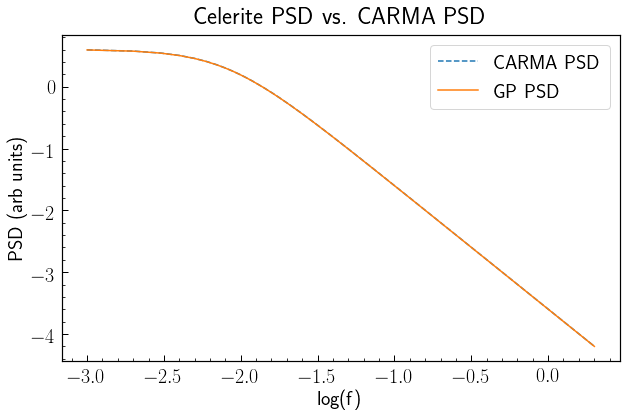

In [5]:
# plot and compare psd
f = np.fft.rfftfreq(4000, 0.25)

fig = plt.figure(figsize=(10,6))
plt.plot(np.log10(f[1:]), np.log10(drw_psd(f)[1:]), label='CARMA PSD', linestyle='--')
plt.plot(np.log10(f[1:]), np.log10(2.5*kernel.get_psd(2*np.pi*f)[1:]), \
         label='GP PSD')
plt.title('Celerite PSD vs. CARMA PSD')
plt.xlabel('log(f)')
plt.ylabel('PSD (arb units)')
plt.legend()

#### 1.2 Test with CARMA(2,0)

In [6]:
# CARMA (2,0)
ar1 = np.array([2, 1.1])
ma1 = np.array([0.5])

sho_1 = CARMA_term(np.log(ar1), np.log(ma1))
sho_1_psd = carma_psd(ar1, ma1)

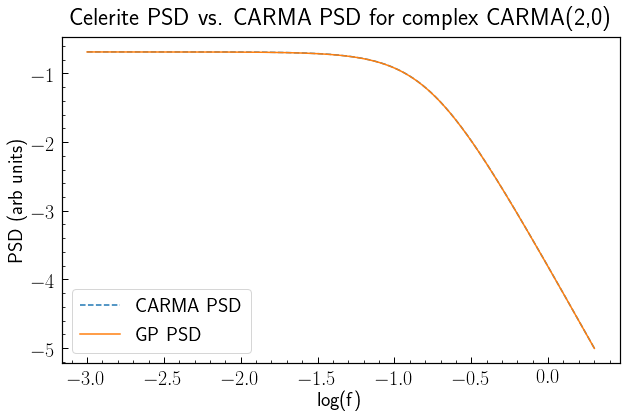

In [7]:
# plot 
fig = plt.figure(figsize=(10,6))
plt.plot(np.log10(f[1:]), np.log10(sho_1_psd(f)[1:]), label='CARMA PSD', linestyle='--')
plt.plot(np.log10(f[1:]), np.log10(2.5*sho_1.get_psd(2*np.pi*f)[1:]), label='GP PSD')
plt.title('Celerite PSD vs. CARMA PSD for complex CARMA(2,0)' )
plt.xlabel('log(f)')
plt.ylabel('PSD (arb units)')
plt.legend()

In [8]:
# CARMA (2,0)
ar2 = np.array([2, 0.5])
ma2 = np.array([2])

sho_2 = CARMA_term(np.log(ar2), np.log(ma2))
sho_2_psd = carma_psd(ar2, ma2)

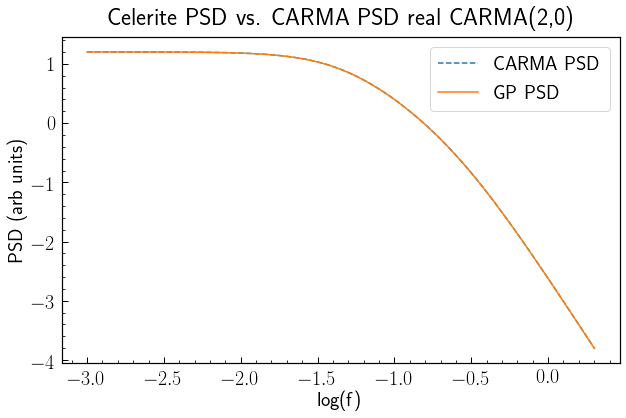

In [9]:
# plot 
fig = plt.figure(figsize=(10,6))
plt.plot(np.log10(f[1:]), np.log10(sho_2_psd(f)[1:]), label='CARMA PSD', linestyle='--')
plt.plot(np.log10(f[1:]), np.log10(2.5*sho_2.get_psd(2*np.pi*f)[1:]), label='GP PSD')
plt.title('Celerite PSD vs. CARMA PSD real CARMA(2,0)')
plt.xlabel('log(f)')
plt.ylabel('PSD (arb units)')
plt.legend()

#### 1.3 Test with CARMA(2,1)

In [10]:
# CARMA (2,1)
ar3 = np.array([2, 0.05])
ma3 = np.array([1, 0.01])

dho_1 = CARMA_term(np.log(ar3), np.log(ma3))
dho_1_psd = carma_psd(ar3, ma3)

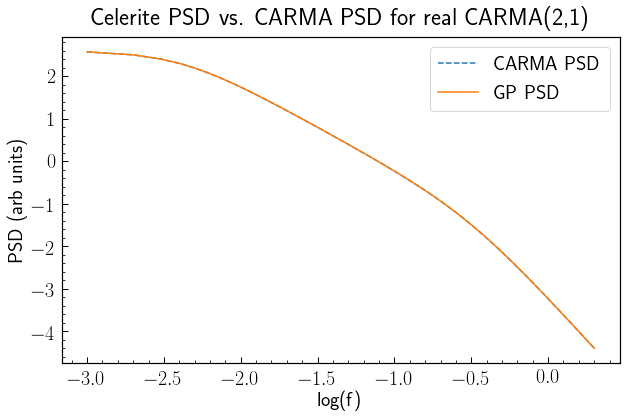

In [11]:
# plot 
fig = plt.figure(figsize=(10,6))
plt.plot(np.log10(f[1:]), np.log10(dho_1_psd(f)[1:]), label='CARMA PSD', linestyle='--')
plt.plot(np.log10(f[1:]), np.log10(2.5*dho_1.get_psd(2*np.pi*f)[1:]), label='GP PSD')
plt.title('Celerite PSD vs. CARMA PSD for real CARMA(2,1)' )
plt.xlabel('log(f)')
plt.ylabel('PSD (arb units)')
plt.legend()

In [12]:
# CARMA (2,1)
ar4 = np.array([2, 2])
ma4 = np.array([1, 0.5])

dho_2 = CARMA_term(np.log(ar4), np.log(ma4))
dho_2_psd = carma_psd(ar4, ma4)

In [13]:
f_high = np.fft.rfftfreq(40000, 0.005)

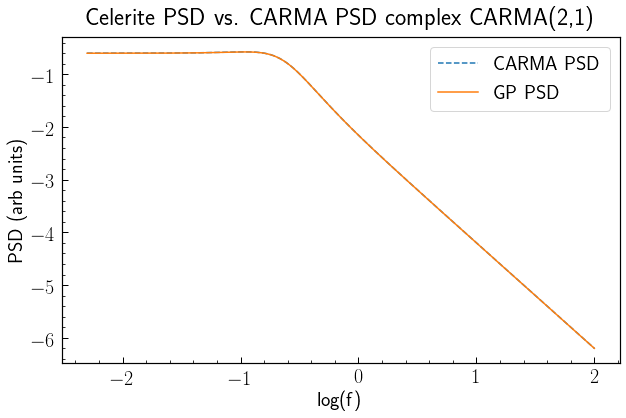

In [14]:
# plot 
fig = plt.figure(figsize=(10,6))
plt.plot(np.log10(f_high[1:]), np.log10(dho_2_psd(f_high)[1:]), label='CARMA PSD', linestyle='--')
plt.plot(np.log10(f_high[1:]), np.log10(2.5*dho_2.get_psd(2*np.pi*f_high)[1:]), label='GP PSD')
plt.title('Celerite PSD vs. CARMA PSD complex CARMA(2,1)')
plt.xlabel('log(f)')
plt.ylabel('PSD (arb units)')
plt.legend()

#### 1.4 Test with CARMA(3,0)

In [42]:
# CARMA (3,0)
ar5 = np.array([3, 2.8, 0.8])
ma5 = np.array([1])

carma30_1 = CARMA_term(np.log(ar5), np.log(ma5))
carma30_1_psd = carma_psd(ar5, ma5)

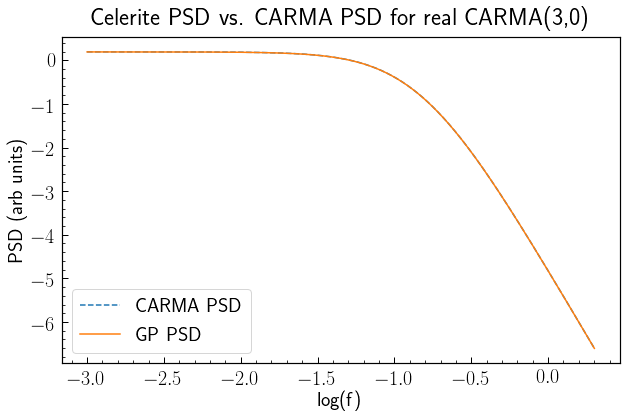

In [43]:
# plot 
fig = plt.figure(figsize=(10,6))
plt.plot(np.log10(f[1:]), np.log10(carma30_1_psd(f)[1:]), label='CARMA PSD', linestyle='--')
plt.plot(np.log10(f[1:]), np.log10(2.5*carma30_1.get_psd(2*np.pi*f)[1:]), label='GP PSD')
plt.title('Celerite PSD vs. CARMA PSD for real CARMA(3,0)' )
plt.xlabel('log(f)')
plt.ylabel('PSD (arb units)')
plt.legend()

In [44]:
# CARMA (3,0)
ar6 = np.array([3, 2.8, 0.2])
ma6 = np.array([1])

carma30_2 = CARMA_term(np.log(ar6), np.log(ma6))
carma30_2_psd = carma_psd(ar6, ma6)

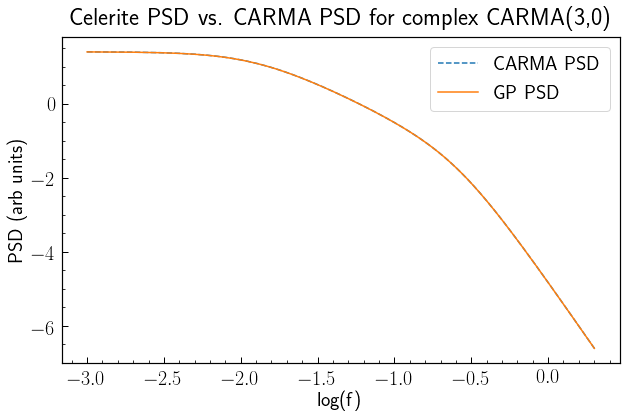

In [45]:
# plot 
fig = plt.figure(figsize=(10,6))
plt.plot(np.log10(f[1:]), np.log10(carma30_2_psd(f)[1:]), label='CARMA PSD', linestyle='--')
plt.plot(np.log10(f[1:]), np.log10(2.5*carma30_2.get_psd(2*np.pi*f)[1:]), label='GP PSD')
plt.title('Celerite PSD vs. CARMA PSD for complex CARMA(3,0)' )
plt.xlabel('log(f)')
plt.ylabel('PSD (arb units)')
plt.legend()